In [1]:
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.shapes.connector import Connector

In [2]:
pptx_path = "TestFiles/test.pptx"
prs = Presentation(pptx_path)

In [3]:
def extract_lines(slide):
    """
    Counts and extracts the positions of all line shapes (including arrows and connectors)
    from a given PowerPoint slide.

    Args:
        slide (Slide): A PowerPoint slide object from a .pptx file.

    Returns:
        tuple:
            - line_count (int): The total number of lines found on the slide.
            - lines (dict): A dictionary where:
                - Key (int): The index of the line shape within the slide.
                - Value (tuple): The start and end coordinates of the line in the format (x1, y1, x2, y2), where:
                    - (x1, y1): The starting point of the line.
                    - (x2, y2): The ending point of the line.
    """
    line_count = 0  # Counter for the number of detected lines
    lines = {}  # Dictionary to store extracted line positions

    # Iterate through all shapes in the slide
    for i, shape in enumerate(slide.shapes):
        # Check if the shape is a line (includes arrows and connectors)
        if shape.shape_type == MSO_SHAPE_TYPE.LINE:
            line_count += 1  # Increment line count

            # Explicitly cast shape to Connector type for clarity
            shape: Connector = shape  

            # Extract start and end coordinates of the line
            x1, y1 = shape.begin_x, shape.begin_y  # Start point
            x2, y2 = shape.end_x, shape.end_y  # End point

            # Store the extracted line coordinates in the dictionary
            lines[i] = (x1, y1, x2, y2)

    return lines, line_count  # Return the total count and dictionary of lines

In [4]:
# Run the function
for slide_num, slide in enumerate(prs.slides, start=1):
    lines, line_count = extract_lines(slide)
    print(line_count)
    for line_id, (x1, y1, x2, y2) in lines.items():
        print(f"Line {line_id}: Start({x1}, {y1}) → End({x2}, {y2})")

8
Line 9: Start(1566054, 427306) → End(1011291, 611780)
Line 10: Start(1566054, 427306) → End(2130968, 594001)
Line 11: Start(2130968, 778381) → End(2130969, 925145)
Line 12: Start(2130969, 1057130) → End(2130969, 1185064)
Line 13: Start(1011291, 743765) → End(1011293, 925142)
Line 14: Start(1011293, 1057127) → End(1011293, 1185064)
Line 15: Start(1011293, 1317049) → End(1325105, 1484708)
Line 16: Start(2130969, 1317049) → End(1762932, 1514959)
8
Line 9: Start(1566054, 427306) → End(1011291, 611780)
Line 10: Start(1566054, 427306) → End(2130968, 594001)
Line 11: Start(2130968, 778381) → End(2130969, 925145)
Line 12: Start(2130969, 1057130) → End(2130969, 1185064)
Line 13: Start(1193645, 1368348) → End(959993, 1499401)
Line 14: Start(1948617, 1368349) → End(2182269, 1499402)
Line 15: Start(1011291, 743765) → End(1011293, 925142)
Line 16: Start(1011293, 1057127) → End(1011293, 1185064)
0
0
0


# Plotting for check

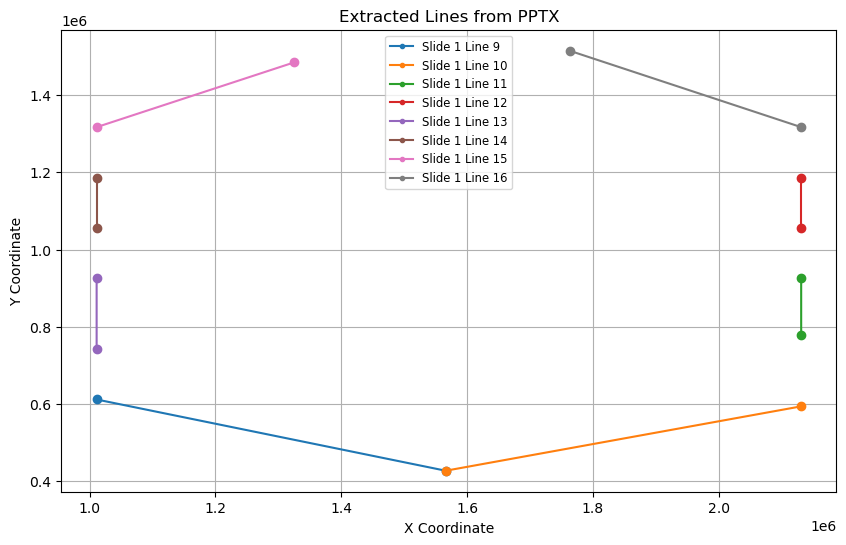

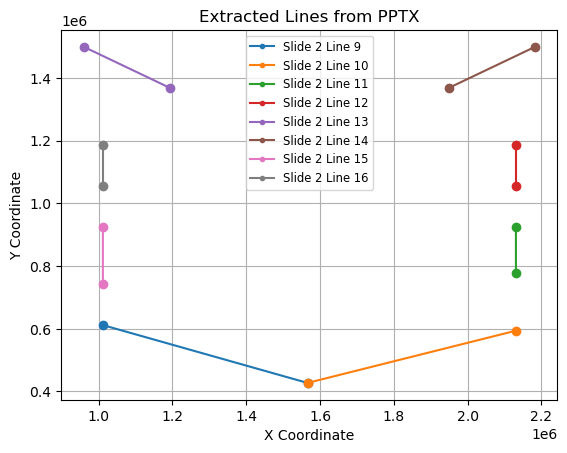

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


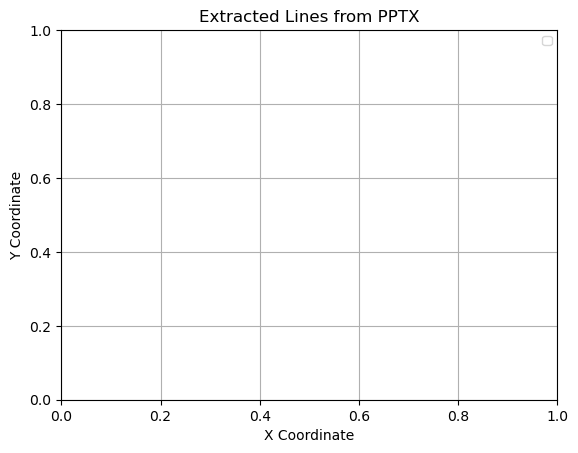

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


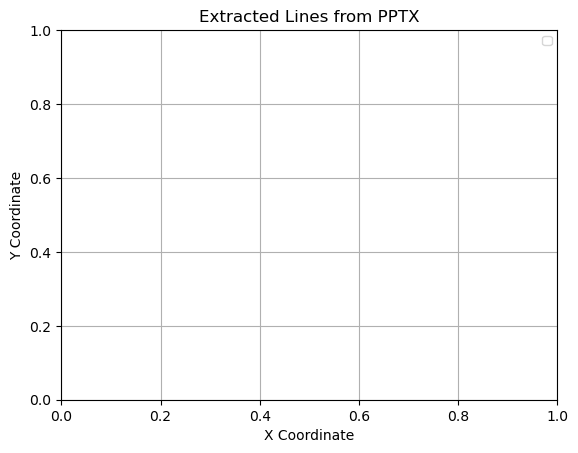

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


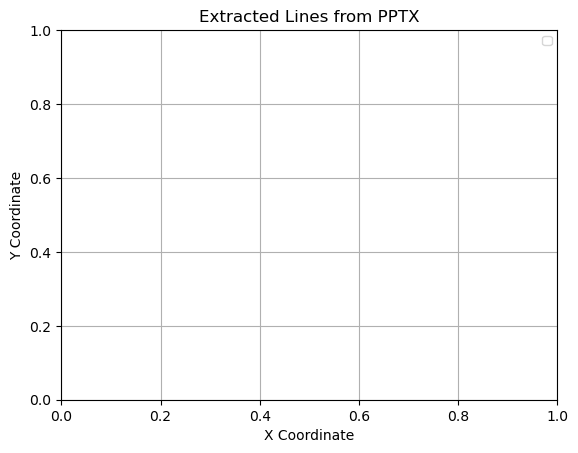

In [5]:
import matplotlib.pyplot as plt

def plot_lines_from_pptx(prs):
    """
    Plots all extracted lines from the PPTX file to verify correct extraction.

    Args:
        prs: The PowerPoint presentation object.
    """
    plt.figure(figsize=(10, 6))

    for slide_num, slide in enumerate(prs.slides, start=1):
        lines, line_count = extract_lines(slide)  # Extract lines for this slide

        for line_id, (x1, y1, x2, y2) in lines.items():
            plt.plot([x1, x2], [y1, y2], marker="o", label=f"Slide {slide_num} Line {line_id}")

        # Flip Y-axis to match PPTX layout (PPTX origin is top-left, matplotlib is bottom-left)
        # plt.gca().invert_yaxis()

        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.title("Extracted Lines from PPTX")
        plt.legend(loc="best", fontsize="small", markerscale=0.5)  # Legend to identify slides
        plt.grid(True)
        plt.show()

# Run the function to plot all extracted lines
plot_lines_from_pptx(prs)